# Importacao de bibliotecas

In [1]:
import pandas as pd; pd.set_option('display.max_rows', 20); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento dados

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [4]:
df.keys()

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [6]:
#Alterando coluna 'explicit' para numero
df['explicit_numeric'] = df['explicit'].astype(int)
test_df['explicit_numeric'] = test_df['explicit'].astype(int)

In [7]:
#dropando colunas de menor importancia
df = df.drop(columns= ['track_id', 'explicit', 'album_name', 'track_name'])
test_df = test_df.drop(columns= ['track_id', 'explicit', 'album_name', 'track_name'])

In [8]:
# Tratar valores NaN na coluna de artistas
test_df['artists'] = test_df['artists'].fillna('')


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#Label encoding de ambos os dfs para treinamento do modelo
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])
df['artist_encoded'] = label_encoder.fit_transform(df['artists'])


test_df['track_genre_encoded'] = label_encoder.fit_transform(test_df['track_genre'])
test_df['artist_encoded'] = label_encoder.fit_transform(test_df['artists'])



# Visualizacao dos dados

In [10]:
df.head()

,track_unique_id,artists,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target,explicit_numeric,track_genre_encoded,artist_encoded
0,41996,Love and Rockets,211533,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0,0,41,13481
1,76471,Filippa Giordano,196000,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0,0,76,7754
2,54809,Susumu Yokota,216506,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1,0,54,21526
3,16326,Franz Liszt;YUNDI,218346,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0,0,16,8029
4,109799,Scooter,173160,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0,0,109,20008


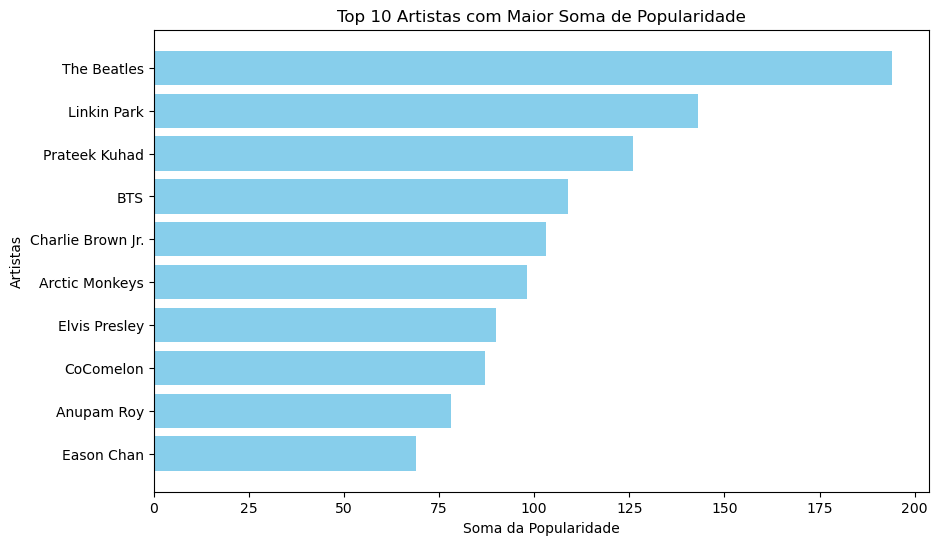

In [11]:
import matplotlib.pyplot as plt

top_10_artists = df.groupby('artists')['popularity_target'].sum().reset_index().sort_values(by='popularity_target', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_artists['artists'], top_10_artists['popularity_target'], color='skyblue')
plt.xlabel('Soma da Popularidade')
plt.ylabel('Artistas')
plt.title('Top 10 Artistas com Maior Soma de Popularidade')
plt.gca().invert_yaxis()  
plt.show()


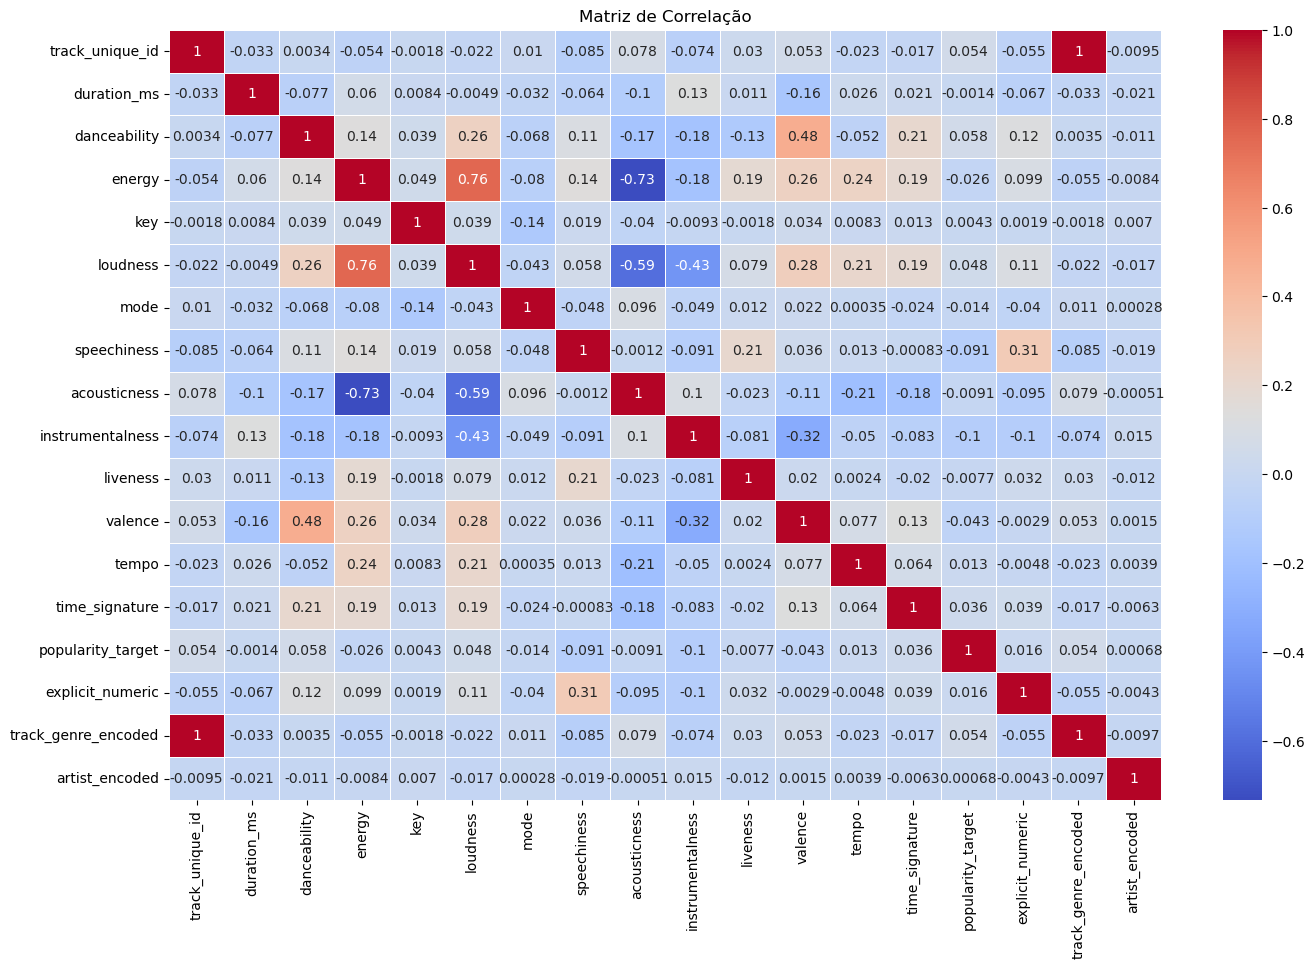

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

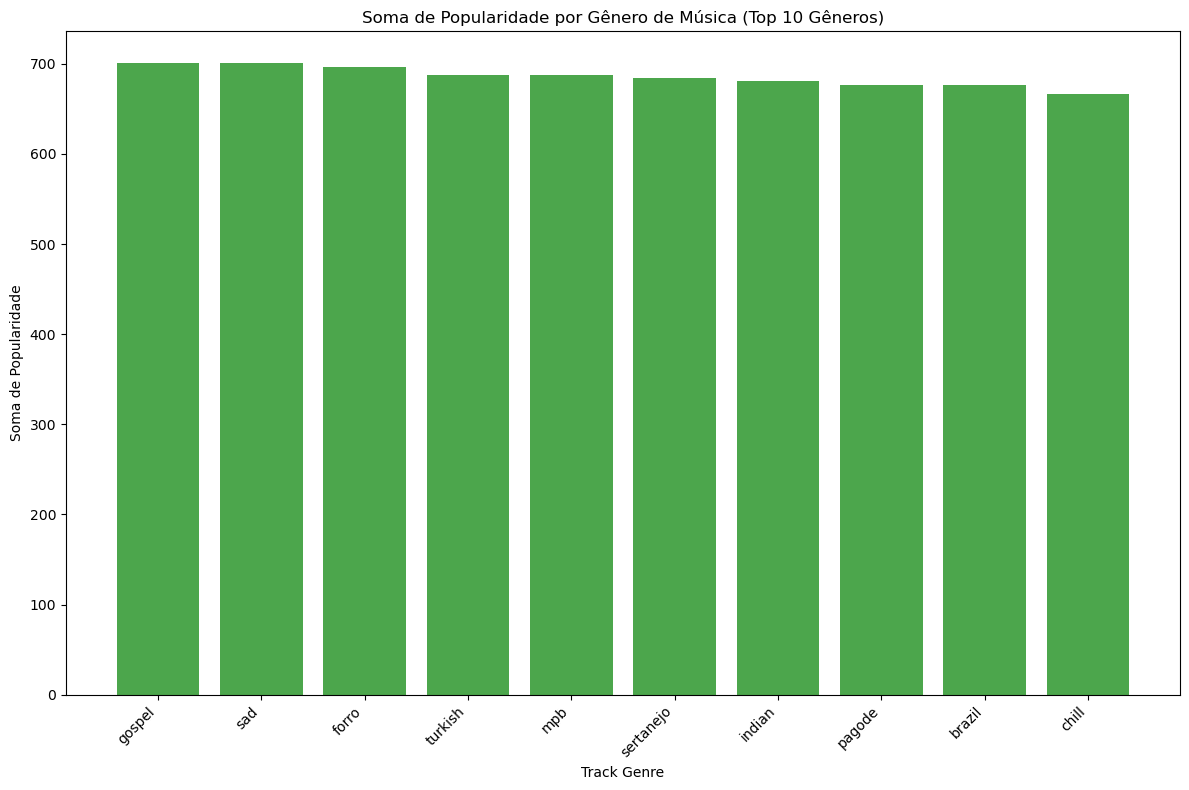

In [13]:
import matplotlib.pyplot as plt

# Filtrar os top 10 gêneros pela soma de 'popularity_target'
top_10_genres = df.groupby('track_genre')['popularity_target'].sum().reset_index().sort_values(by='popularity_target', ascending=False).head(10)

# Plotar o histograma dos top 10 gêneros de música com base na soma de 'popularity_target'
plt.figure(figsize=(12,8))
plt.bar(top_10_genres['track_genre'], top_10_genres['popularity_target'], color='green', alpha=0.7)

# Ajustes no gráfico
plt.xlabel('Track Genre')
plt.ylabel('Soma de Popularidade')
plt.title('Soma de Popularidade por Gênero de Música (Top 10 Gêneros)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos gêneros para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

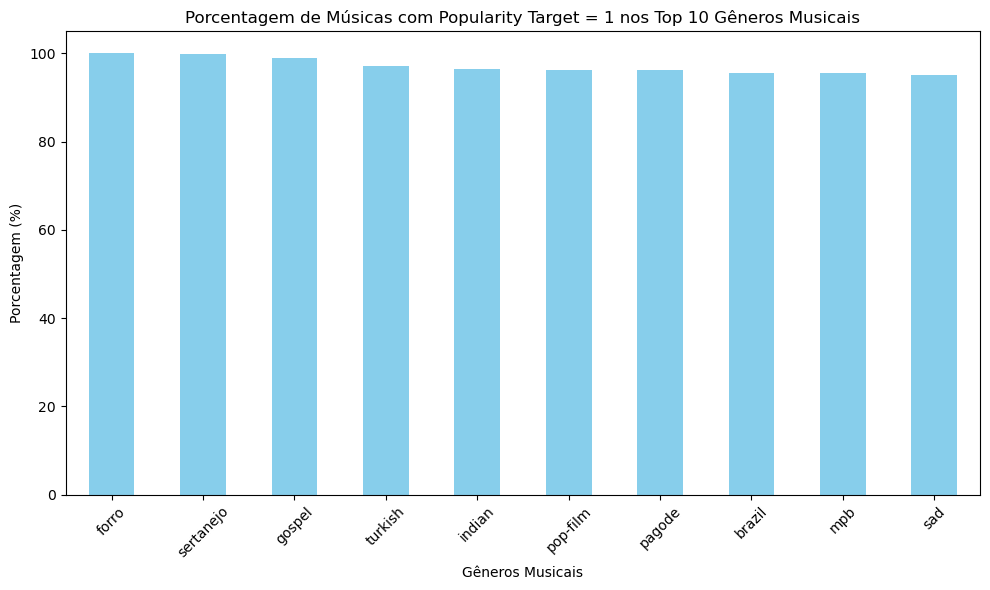

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df_pop_target_1 = df[df['popularity_target'] == 1]

genre_count_pop1 = df_pop_target_1['track_genre'].value_counts()

genre_count_total = df['track_genre'].value_counts()

genre_percentage_pop1 = (genre_count_pop1 / genre_count_total) * 100
top_10_genres = genre_percentage_pop1.nlargest(10)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Músicas com Popularity Target = 1 nos Top 10 Gêneros Musicais')
plt.xlabel('Gêneros Musicais')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Modelo random forest

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:

# Separar as features (X) e a target (y) do conjunto de treino
X = df.drop(columns=['popularity_target', 'track_unique_id', 'artists', 'track_genre'])  # Remova as colunas irrelevantes
y = df['popularity_target']

# Dividir o conjunto de dados em 80% para treino e 20% para teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

rf_model = RandomForestClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model = RandomForestClassifier(max_depth=10, random_state=42)
rf_model = RandomForestClassifier(min_samples_leaf=5, random_state=42)
rf_model = RandomForestClassifier(min_samples_split=10, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)


rf_model.fit(X_train, y_train)

# Avaliar o modelo otimizado
y_pred = rf_model.predict(X_val)
print("Acurácia no conjunto de validação:", accuracy_score(y_val, y_pred))


Acurácia no conjunto de validação: 0.8114035087719298


In [18]:
test_df_ids = test_df['track_unique_id']  # Salvar os IDs das músicas

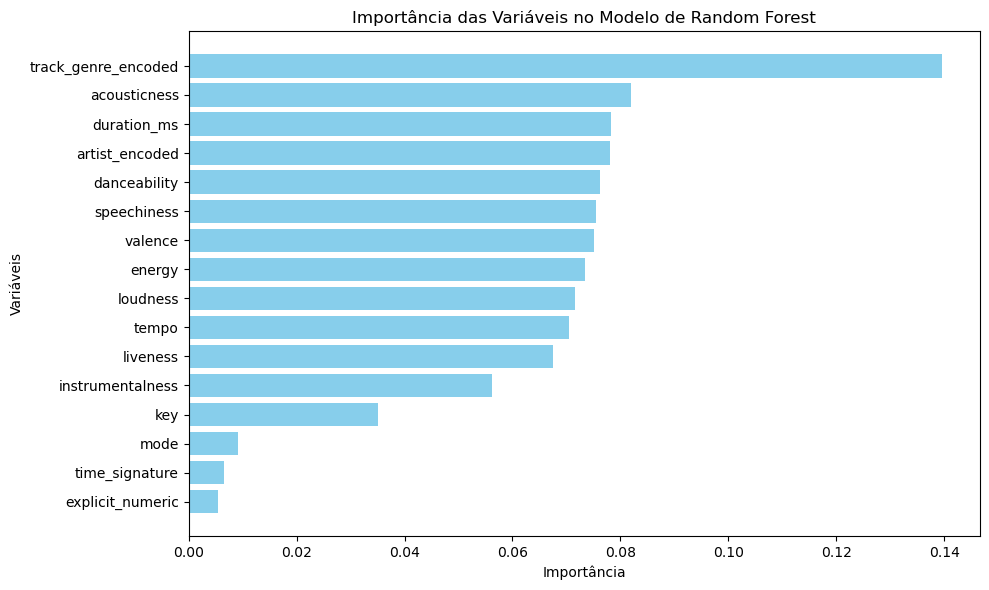

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obter a importância das features do modelo treinado
importances = rf_model.feature_importances_

# Obter os nomes das features (as colunas do DataFrame X)
feature_names = X_train.columns

# Criar um DataFrame para armazenar as importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar o DataFrame pelas importâncias
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar o gráfico de barras das importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo de Random Forest')
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a variável mais importante esteja no topo
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [20]:
def gerar_csv_previsao(test_df, modelo, output_file='submission.csv'):
    X_test = test_df.drop(columns=['track_unique_id', 'artists', 'track_genre', 'artist_main', 'artist_secondary'], errors='ignore')
    
    # Fazer as previsões no conjunto de teste
    y_pred_test = modelo.predict(X_test)
    
    # Criar um DataFrame com os resultados
    submission_df = pd.DataFrame({
        'track_unique_id': test_df_ids,
        'popularity_target': y_pred_test
    })
    
    # Salvar o DataFrame como um arquivo CSV
    submission_df.to_csv(output_file, index=False)
    print(f"Arquivo '{output_file}' gerado com sucesso!")

# Chamar a função para gerar o arquivo .csv
gerar_csv_previsao(test_df, rf_model)


Arquivo 'submission.csv' gerado com sucesso!
